In [1]:
# Header
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise import KNNWithMeans
from surprise import NMF, SVD
from collections import Counter
from collections import defaultdict
from surprise.model_selection import KFold
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection.validation import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.predictions import Prediction
from surprise.prediction_algorithms import matrix_factorization
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [2]:
##QUESTION 1
print("-------------Question 1-------------")
#load data from ratings.csv      
file_path = os.path.expanduser('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data_in_ratings = Dataset.load_from_file(file_path,reader=reader)

# compute the sparsity
user_id,count_user = np.unique([data[0] for data in data_in_ratings.raw_ratings],return_counts=True)   
movie_id,count_movie = np.unique([data[1] for data in data_in_ratings.raw_ratings],return_counts=True) 
ratings = np.array([data[2] for data in data_in_ratings.raw_ratings])

num_user = len(user_id)
num_movie = len(movie_id)
num_rating = len(ratings)
print(num_user,num_movie,num_rating)
sparsity = num_rating / (num_user * num_movie)
print('the sparsity value is : ',sparsity)

-------------Question 1-------------
610 9724 100836
the sparsity value is :  0.016999683055613623


-------------Question 2-------------


([<matplotlib.axis.XTick at 0x17496bd4f28>,
 <a list of 12 Text xticklabel objects>)

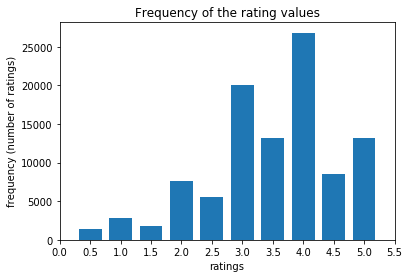

In [3]:
##QUESTION 2
print("-------------Question 2-------------")
bins = np.arange(0.25,5.75,0.5)
plt.hist(ratings, bins=bins, rwidth = 0.75)
plt.xlabel('ratings')
plt.ylabel('frequency (number of ratings)')
plt.title('Frequency of the rating values')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])

-------------Question 3-------------


Text(0.5, 1.0, 'Distribution of the number of ratings received among movies')

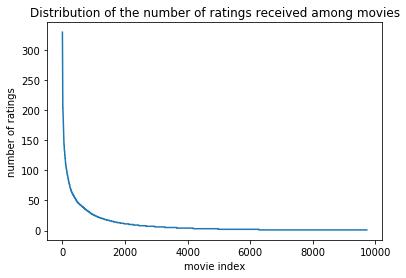

In [4]:
##QUESTION 3
print("-------------Question 3-------------")
# sort the count_movie array and make it in a decreasing order
num_movie_rating = count_movie[np.argsort(- count_movie)]

#plot the frequency
plt.plot(num_movie_rating)
plt.ylabel('number of ratings')
plt.xlabel('movie index')
plt.title('Distribution of the number of ratings received among movies')

-------------Question 4-------------


Text(0.5, 1.0, 'Distribution of the number of ratings received among users')

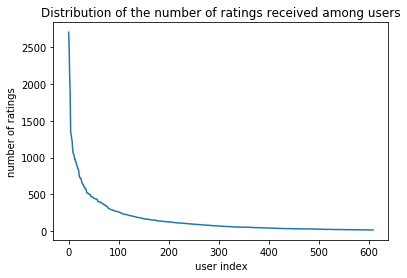

In [5]:
##QUESTION 4
print("-------------Question 4-------------")
# sort the count_user array and make it in a decreasing order
num_user_rating = count_user[np.argsort(- count_user)]
#plot the frequency
plt.plot(num_user_rating)
plt.ylabel('number of ratings')
plt.xlabel('user index')
plt.title('Distribution of the number of ratings received among users')

-------------Question 6-------------
(100836, 3)
(9724,)


C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(9724,)


Text(0.5, 1.0, '')

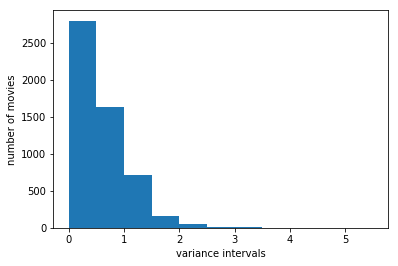

In [6]:
## QUESTION 6
print("-------------Question 6-------------")
# transfer the information in ratings.csv to numpy arrays
user_data = np.array([int(data[0]) for data in data_in_ratings.raw_ratings])
movie_data = np.array([int(data[1]) for data in data_in_ratings.raw_ratings])
ratings_data = np.array([float(data[2]) for data in data_in_ratings.raw_ratings])

# build a matrix
concat_data = np.vstack([user_data,movie_data,ratings_data]).T
print(concat_data.shape)
var = np.zeros(num_movie)
print(var.shape)
for movie_id in np.arange(1,num_movie+1):
    ratings_vs_movie = concat_data[:,2][concat_data[:,1]==movie_id]
    var[movie_id-1] = np.var(ratings_vs_movie)


print(var.shape)
max_edge = int(max(var))+1
bins = np.arange(0,max_edge,0.5)
plt.hist(var, bins=bins)
plt.xlabel('variance intervals')
plt.ylabel('number of movies')
plt.title('')


In [7]:
## QUESTION 5
print("-------------Question 5-------------")
print("Exponential decay curve means that ratings matrix will be sparse. We only have lot of ratings for a few movies, \
and the rest have few ratings.")

-------------Question 5-------------
Exponential decay curve means that ratings matrix will be sparse. We only have lot of ratings for a few movies, and the rest have few ratings.


In [8]:
## QUESTION 7
print("-------------Question 7-------------")
print("\u03BC_u = (Sum of ratings given by user)/(Number of ratings given by user)")
print("\u03BC_u = \u03A3_{I_u} r_{uk} / |I_u|")

-------------Question 7-------------
μ_u = (Sum of ratings given by user)/(Number of ratings given by user)
μ_u = Σ_{I_u} r_{uk} / |I_u|


In [9]:
## QUESTION 8
print("-------------Question 8-------------")
print("Iu \u03A0 Iv represents the set of movies rated by both users u and v. It can be empty, meaning that two users \
haven't seen any of the same movies, because the ratings matrix is sparse.")

-------------Question 8-------------
Iu Π Iv represents the set of movies rated by both users u and v. It can be empty, meaning that two users haven't seen any of the same movies, because the ratings matrix is sparse.


In [10]:
## QUESTION 9
print("-------------Question 9-------------")
print("Mean-centering the raw ratings is important to mitigate for biased users who only give high or low scores. \
Removing the mean corresponds to taking into account only the variances of ratings and not their absolute value.")

-------------Question 9-------------
Mean-centering the raw ratings is important to mitigate for biased users who only give high or low scores. Removing the mean corresponds to taking into account only the variances of ratings and not their absolute value.


-------------Question 10-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

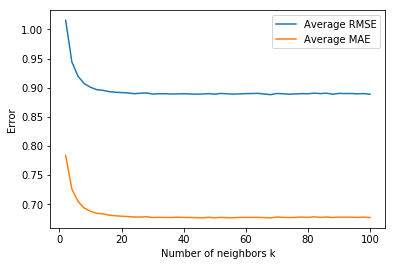

In [11]:
## QUESTION 10
print("-------------Question 10-------------")

RMSE_list = []
MAE_list = []
k_list = np.arange(2,102,2)
for k in k_list:
    # build a model
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson', 'user_based':True}) 
    # use the model we built to do 10-fold cross validation and get the validation accuracy for 10 validation sets
    val_accuracy = cross_validate(knn, data_in_ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    # calculate the mean accuracy
    rmse_mean = np.mean(val_accuracy['test_rmse'])
    mae_mean = np.mean(val_accuracy['test_mae'])
    # store the mean into the list
    RMSE_list.append(rmse_mean)
    MAE_list.append(mae_mean)

plt.plot(k_list, RMSE_list, label = "Average RMSE")
plt.plot(k_list, MAE_list, label = "Average MAE")
plt.xlabel('Number of neighbors k')
plt.ylabel('Error')
plt.legend()
plt.show()

RMSE:
 [1.0157622279549179, 0.9440720013491395, 0.9194860184560103, 0.9069000326530796, 0.9007405325364687, 0.8965631610108478, 0.895554267425824, 0.8932525625067962, 0.8922139314408171, 0.8916356466594092, 0.8909923500582296, 0.889750572899999, 0.8904649321900294, 0.8910036914360099, 0.8891952983777074, 0.8895546663630729, 0.8896867248367044, 0.8890976173094474, 0.8894019251975955, 0.8895943643227184, 0.8892819168866518, 0.8888616593331766, 0.8891947277937919, 0.8898801134311534, 0.8888653951822183, 0.8901222242435072, 0.8895870416782472, 0.8889871548553117, 0.8893346990533644, 0.8898817815456898, 0.8900119553574954, 0.8902616555273646, 0.8890464298038461, 0.8880989575226692, 0.890084832305396, 0.8895960852078323, 0.8888459970518909, 0.8893586654080046, 0.8898172611990154, 0.8896102483191386, 0.890650024311088, 0.8899103948373561, 0.8905746838678821, 0.8888193583198806, 0.8902367863248155, 0.8899492986369252, 0.8900412941309529, 0.8894876737580629, 0.889866742837716, 0.888780528099811

Text(0.5, 1.0, 'average MAE vs. k')

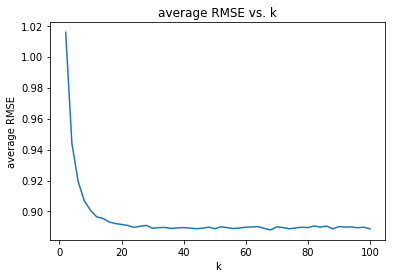

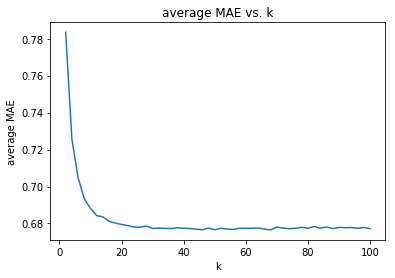

In [12]:
print('RMSE:\n', RMSE_list)
print('MAE:\n', MAE_list)

plt.figure()
plt.plot(k_list,RMSE_list)
plt.xlabel('k')
plt.ylabel('average RMSE')
plt.title('average RMSE vs. k')

plt.figure()
plt.plot(k_list,MAE_list)
plt.xlabel('k')
plt.ylabel('average MAE')
plt.title('average MAE vs. k')

In [13]:
print("-------------Question 11-------------")
print("From the figures above, we can see that the minimum k for which average RMSE and average MAE converges to a steady-state value, is k=20.")

-------------Question 11-------------
From the figures above, we can see that the minimum k for which average RMSE and average MAE converges to a steady-state value, is k=20.


In [14]:
print("-------------Question 12-------------")
def trimPopular(data):
    movies_ratings = Counter([x[1] for x in data])
    trimmed_data = [x for x in data if movies_ratings[x[1]] > 2]
    return trimmed_data

k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        predictions = knn.test(trimPopular(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 12-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Minimum average RMSE = 0.855543 (for k = 34)


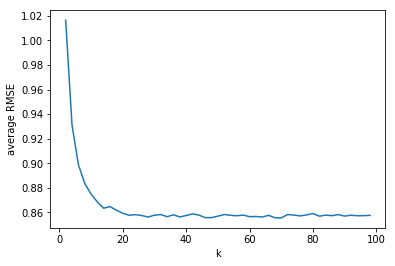

In [15]:
plt.figure()
plt.plot(k_list,avg_RMSE)
plt.xlabel('k')
plt.ylabel('average RMSE')
print('Minimum average RMSE = %f (for k = %d)' %(np.min(avg_RMSE),np.argmin(avg_RMSE)))

In [16]:
print("-------------Question 13-------------")
def trimUnpopular(data):
    movies_ratings = Counter([x[1] for x in data])
    trimmed_data = [x for x in data if movies_ratings[x[1]] <= 2]
    return trimmed_data

k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        predictions = knn.test(trimUnpopular(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 13-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

In [17]:
print("-------------Question 14-------------")
def trimHighVar(data):
    # Build ratings matrix
    movies_ratings = defaultdict(list)
    for x in data:
        movies_ratings[x[1]].append(x[2])
    
    trimmed_data = [x for x in data if len(movies_ratings[x[1]]) >= 5 and np.var(movies_ratings[x[1]]) >= 2.0]
    return trimmed_data
"""
ratingMatrix = {}
for row in data_in_ratings.raw_ratings:
    if row[1] not in ratingMatrix:
        ratingMatrix[row[1]] = []
    ratingMatrix[row[1]].append(row[2])

variance = {}
for movie in ratingMatrix:
    variance[movie] = np.var(ratingMatrix[movie])

#movies that have high variance
highVar_movies = [x for x in ratingMatrix if len(ratingMatrix[x]) >= 5 and variance[x] >= 2]
"""
    
k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        #trimHighVar = [x for x in testset if x[1] in highVar_movies]
        predictions = knn.test(trimHighVar(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 14-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Minimum average RMSE =  1.3570899218793135


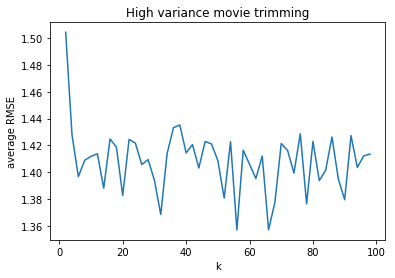

In [18]:
plt.figure()
plt.plot(k_list,avg_RMSE)
plt.xlabel('k')
plt.ylabel('average RMSE')
plt.title('High variance movie trimming')
#print('Minimum average RMSE = %f (for k = %d)' %(np.min(avg_RMSE),np.argmin(avg_RMSE)*2+2))
print('Minimum average RMSE = ', np.min(avg_RMSE))

-------------Question 15-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.


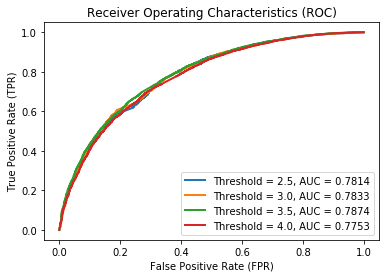

In [19]:
print("-------------Question 15-------------")
trainset, testset = train_test_split(data_in_ratings, test_size=0.1, random_state=0)
thresholds = [2.5,3,3.5,4]
knn = KNNWithMeans(k=20, sim_options = {'name':'pearson'}) 
knn.fit(trainset)
predictions = knn.test(testset) #list of prediction object: contains attribute r_ui (true rating) and est (estimated rating)
true_ratings = np.array([i.r_ui for i in predictions])
pred_ratings = np.array([i.est for i in predictions])

plt.figure()
for t in thresholds: 
    y_true = true_ratings>=t
    y_pred = pred_ratings
    FPR, TPR, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(FPR, TPR)
    #plt.figure()
    plt.plot(FPR, TPR, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (t,roc_auc))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc ='lower right')
    plt.title('Receiver Operating Characteristics (ROC)')
    #plt.title('Receiver Operating Characteristics (ROC) for threshold = %0.1f' %t)
    #plt.show()

In [20]:
print("-------------Question 16-------------")
print("")

-------------Question 16-------------



-------------Question 17-------------


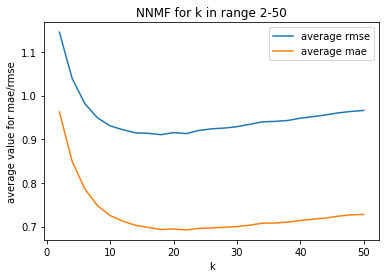

In [21]:
print("-------------Question 17-------------")
avg_rmse = []
avg_mae = []

# k from 2 to 50 in step sizes of 2
k = range(2,52,2)
for i in k :
    result = cross_validate(matrix_factorization.NMF(n_factors=i), data_in_ratings, measures=['rmse', 'mae'], cv=10)
        # Compute and print Root Mean Squared Error
    avg_rmse.append(np.mean(result['test_rmse']))
    avg_mae.append(np.mean(result['test_mae']))

plt.plot(k, avg_rmse, label = "average rmse")
plt.plot(k, avg_mae, label = "average mae")
plt.title("NNMF for k in range 2-50")
plt.xlabel("k")
plt.ylabel("average value for mae/rmse")
plt.legend()
plt.show()

In [22]:
print("-------------Question 18-------------")
minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
minMAE = min(avg_mae)
kMinMAE = avg_mae.index(min(avg_mae))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))
print("When k is %d, the minimum MAE is %f" % (kMinMAE, minMAE))
print("The optimal number of latent factors is 20 and the movie genres is 18. The are not the same but very close")



-------------Question 18-------------
When k is 18, the minimum RMSE is 0.910516
When k is 22, the minimum MAE is 0.692448
The optimal number of latent factors is 20 and the movie genres is 18. The are not the same but very close


In [23]:
# Define the data trimming function
def trimData(data,choice):
    # Build ratings matrix
    if choice == "popMovi" :
        movies_ratings = Counter([x[1] for x in data])
        trimmed_data = [x for x in data if movies_ratings[x[1]] > 2]
    elif choice == "unpopMovi" :
        movies_ratings = Counter([x[1] for x in data])
        trimmed_data = [x for x in data if movies_ratings[x[1]] <= 2]
    elif choice == "highVar" :
        # Build ratings matrix
        movies_ratings = defaultdict(list)
        for x in data:
            movies_ratings[x[1]].append(x[2])
        trimmed_data = [x for x in data if len(movies_ratings[x[1]]) >= 5 and np.var(movies_ratings[x[1]]) >= 2.0]
    else :
        trimmed_data = data
    return trimmed_data

-------------Question 19-------------
[1.1429145223484483, 1.1263302719023605, 1.1380153697774518, 1.145537224383944, 1.1393270477113109, 1.1371076414327224, 1.1304281008862622, 1.1353694471903133, 1.1426573559753006, 1.135611178078324]
[1.012721205972809, 1.0127604263111103, 1.0160500964492614, 1.0050007706288657, 1.0107700159975486, 1.0136145774256522, 1.01564661300378, 1.0189542201441835, 1.0267915264345455, 1.0102342793776193]
[0.9311881078130274, 0.9395326561780001, 0.9358310551351343, 0.9467165974292702, 0.9459280416880517, 0.9571688193721835, 0.9514161821692981, 0.9442603084826738, 0.9474315593488504, 0.950325803751893]
[0.9092234042822381, 0.9112799900340298, 0.9112570629728295, 0.9127964610557336, 0.8994450471758575, 0.9087693595058981, 0.9175911531377318, 0.915582958874664, 0.9245994598181414, 0.9255961358368101]
[0.8883508099750431, 0.9006514046028282, 0.8925464709108338, 0.882765729203881, 0.8829293856867395, 0.8974168487894505, 0.8887208055621325, 0.8978219116154653, 0.886

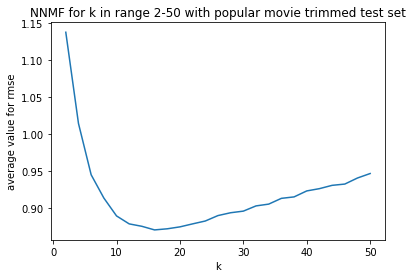

When k is 16, the minimum RMSE is 0.870568


In [24]:
print("-------------Question 19-------------")
# k from 2 to 50 in step sizes of 2
k = range(2,52,2)

avg_rmse = []
kf = KFold(n_splits=10)

for i in k:
    nnmf = matrix_factorization.NMF(n_factors=i) 
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        nnmf.fit(trainset)
        predictions = nnmf.test(trimData(testset,'popMovi'))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    
    avg_rmse.append(np.mean(k_rmse))

plt.plot(k, avg_rmse)
plt.title("NNMF for k in range 2-50 with popular movie trimmed test set")
plt.xlabel("k")
plt.ylabel("average value for rmse")
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))

-------------Question 20-------------


No handles with labels found to put in legend.


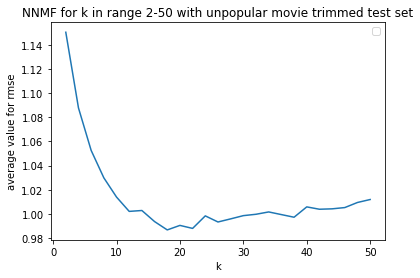

When k is 18, the minimum RMSE is 0.986688


In [30]:
print("-------------Question 20-------------")
# k from 2 to 50 in step sizes of 2
k = range(2,52,2)

avg_rmse = []
kf = KFold(n_splits=10)

for i in k:
    nnmf = matrix_factorization.NMF(n_factors=i) 
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        nnmf.fit(trainset)
        predictions = nnmf.test(trimData(testset,'unpopMovi'))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
        
    avg_rmse.append(np.mean(k_rmse))

plt.plot(k, avg_rmse)
plt.title("NNMF for k in range 2-50 with unpopular movie trimmed test set")
plt.xlabel("k")
plt.ylabel("average value for rmse")
plt.legend()
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))


-------------Question 21-------------


No handles with labels found to put in legend.


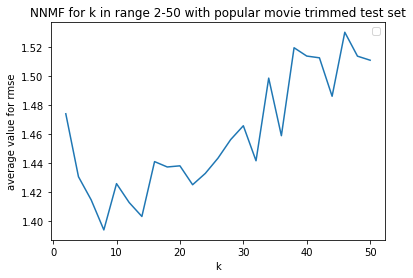

When k is 8, the minimum RMSE is 1.393771


In [31]:
print("-------------Question 21-------------")
# k from 2 to 50 in step sizes of 2
k = range(2,52,2)

avg_rmse = []
kf = KFold(n_splits=10)

for i in k:
    nnmf = matrix_factorization.NMF(n_factors=i) 
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        nnmf.fit(trainset)
        predictions = nnmf.test(trimData(testset,highVar))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
        
    avg_rmse.append(np.mean(k_rmse))

plt.plot(k, avg_rmse)
plt.title("NNMF for k in range 2-50 with popular movie trimmed test set")
plt.xlabel("k")
plt.ylabel("average value for rmse")
plt.legend()
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))

-------------Question 22-------------


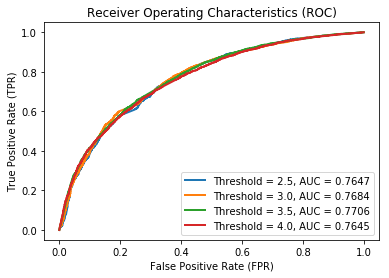

In [27]:
print("-------------Question 22-------------")
trainset, testset = train_test_split(data_in_ratings, test_size=0.1, random_state=0)
thresholds = [2.5,3,3.5,4]
nmf = matrix_factorization.NMF(n_factors=18) 
nmf.fit(trainset)
predictions = nmf.test(testset) #list of prediction object: contains attribute r_ui (true rating) and est (estimated rating)
true_ratings = np.array([i.r_ui for i in predictions])
pred_ratings = np.array([i.est for i in predictions])

plt.figure()
for t in thresholds: 
    y_true = true_ratings>=t
    y_pred = pred_ratings
    FPR, TPR, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(FPR, TPR)
    #plt.figure()
    plt.plot(FPR, TPR, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (t,roc_auc))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc ='lower right')
    plt.title('Receiver Operating Characteristics (ROC)')
    #plt.title('Receiver Operating Characteristics (ROC) for threshold = %0.1f' %t)

plt.show()

In [28]:
print("-------------Question 23-------------")
data_movies = pd.read_csv('ml-latest-small/movies.csv', names = ['movieid', 'title', 'genres'],header=0)
nmf = matrix_factorization.NMF(n_factors=20)
trainset, testset = train_test_split(data_in_ratings, test_size=0.1, random_state=0)
nmf.fit(trainset)

V = nmf.qi
U = nmf.pu

print("Matrix V: ", V.shape)
print("Matrix U: ", U.shape)

# Let's consider 3 random columns of V
for k in [1,7,19]:
    print(">>>> Column", k, "of matrix V --------\n")
    V_k = V[:,k]
    # We will sort movies in descending order, so we need to know the initial index for each movie to retrieve it later
    moviesIndex = []
    for j in range(len(V_k)):
        moviesIndex.append((j, V_k[j]))
    # Sort the movies based on value in V (index 1 of tuples)
    moviesIndex.sort(key=lambda x: x[1], reverse=True)
    for m in moviesIndex[0:10]:
        print(data_movies['genres'][m[0]])
    print("----------------------------------\n")

-------------Question 23-------------
Matrix V:  (9375, 20)
Matrix U:  (610, 20)
>>>> Column 1 of matrix V --------

Action|Mystery|Thriller
Comedy|Romance
Drama|Romance
Documentary
Comedy|Romance
Drama
Comedy|Fantasy
Drama
Action|Adventure|Drama|Romance|War
Comedy|Crime|Mystery|Thriller
----------------------------------

>>>> Column 7 of matrix V --------

Drama
Comedy
Comedy
Drama|Fantasy|Romance
Comedy
Comedy|Romance
Drama|Mystery
Horror
Musical
Children|Comedy
----------------------------------

>>>> Column 19 of matrix V --------

Drama
Comedy|Drama
Children|Drama|Fantasy|Romance
Drama|Romance
Children|Comedy
Comedy|Drama|Romance
Horror|Mystery|Thriller
Drama
Comedy
Comedy|Romance
----------------------------------



-------------Question 24-------------


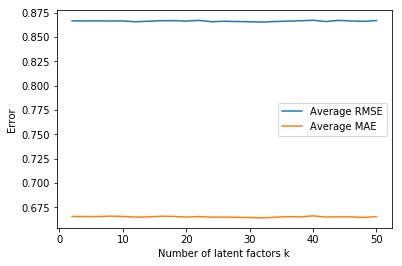

The minimum average RMSE is 0.865262 for k = 15


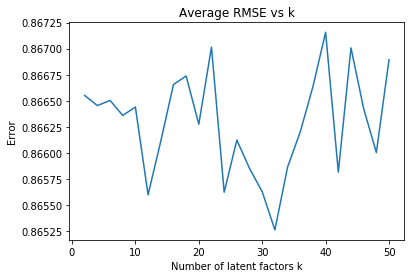

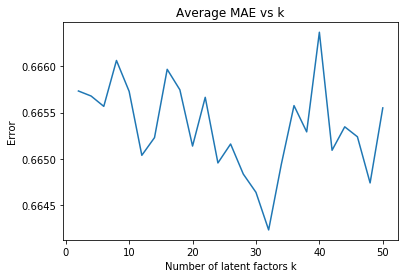

In [32]:
print("-------------Question 24-------------")
k_list = range(2,52,2)
RMSE_list = []
MAE_list = []
kf = KFold(n_splits=10)

for k in k_list:
    svd = SVD(n_factors=k, biased=True)
    val_accuracy = cross_validate(svd, data_in_ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    # calculate the mean accuracy
    rmse_mean = np.mean(val_accuracy['test_rmse'])
    mae_mean = np.mean(val_accuracy['test_mae'])
    # store the mean into the list
    RMSE_list.append(rmse_mean)
    MAE_list.append(mae_mean)
        
plt.plot(k_list, RMSE_list, label = "Average RMSE")
plt.plot(k_list, MAE_list, label = "Average MAE")
plt.xlabel('Number of latent factors k')
plt.ylabel('Error')
plt.legend()
plt.show()

print('The minimum average RMSE is %f for k = %d' %(np.min(RMSE_list),np.argmin(RMSE_list)))

plt.figure()
plt.plot(k_list, RMSE_list)
plt.title("Average RMSE vs k")
plt.xlabel('Number of latent factors k')
plt.ylabel('Error')
plt.show()

plt.figure()
plt.plot(k_list, MAE_list)
plt.title("Average MAE vs k")
plt.xlabel('Number of latent factors k')
plt.ylabel('Error')
plt.show()

In [33]:
print("-------------Question 25-------------")
# Indexes of min RMSE and MAE
l1 = np.argmin(RMSE_list)
l2 = np.argmin(MAE_list)

print("min average RMSE = ", RMSE_list[l1], " is obtained for k=", k_list[l1])
print("min average MAE = ", MAE_list[l2], " is obtained for k=", k_list[l2])
print("\nThe optimal number of latent factors is the max between the two for RMSE and MAE: k=", max(k_list[l1],k_list[l2]))

-------------Question 25-------------
min average RMSE =  0.8652620805284249  is obtained for k= 32
min average MAE =  0.6642288393586739  is obtained for k= 32

The optimal number of latent factors is the max between the two for RMSE and MAE: k= 32


-------------Question 26-------------


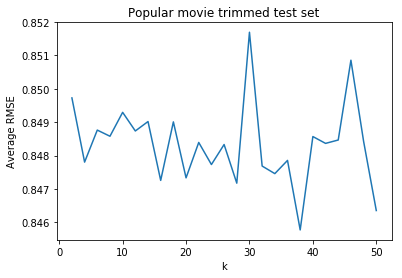

When k is 38, the minimum RMSE is 0.845772


In [34]:
print("-------------Question 26-------------")
# k from 2 to 50 in step sizes of 2
k_list = range(2,52,2)

avg_rmse = []
kf = KFold(n_splits=10)

for k in k_list:
    svd = SVD(n_factors=k, biased=True)
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        svd.fit(trainset)
        predictions = svd.test(trimData(testset,'popMovi'))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    
    avg_rmse.append(np.mean(k_rmse))

plt.plot(k_list, avg_rmse)
plt.title("Popular movie trimmed test set")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))

-------------Question 27-------------


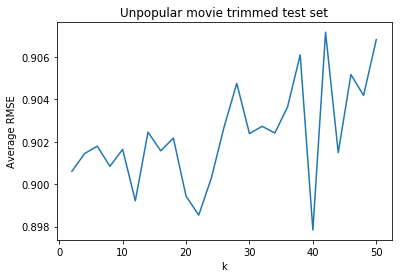

When k is 40, the minimum RMSE is 0.897841


In [35]:
print("-------------Question 27-------------")
# k from 2 to 50 in step sizes of 2
k_list = range(2,52,2)

avg_rmse = []
kf = KFold(n_splits=10)

for k in k_list:
    svd = SVD(n_factors=k, biased=True)
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        svd.fit(trainset)
        predictions = svd.test(trimData(testset,'unpopMovi'))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    
    avg_rmse.append(np.mean(k_rmse))
    
plt.plot(k_list, avg_rmse)
plt.title("Unpopular movie trimmed test set")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))

-------------Question 28-------------


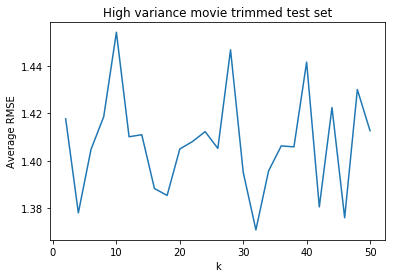

When k is 32, the minimum RMSE is 1.370701


In [36]:
print("-------------Question 28-------------")
# k from 2 to 50 in step sizes of 2
k_list = range(2,52,2)
avg_rmse = []
kf = KFold(n_splits=10)

for k in k_list:
    svd = SVD(n_factors=k, biased=True)
    k_rmse = []
    
    for trainset, testset in kf.split(data_in_ratings):
        svd.fit(trainset)
        predictions = svd.test(trimData(testset,'highVar'))
        k_rmse.append(accuracy.rmse(predictions, verbose=False))
    
    avg_rmse.append(np.mean(k_rmse))
    
plt.plot(k_list, avg_rmse)
plt.title("High variance movie trimmed test set")
plt.xlabel("k")
plt.ylabel("Average RMSE")
plt.show()

minRMSE = min(avg_rmse)
kMinRMSE = avg_rmse.index(min(avg_rmse))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))

-------------Question 29-------------


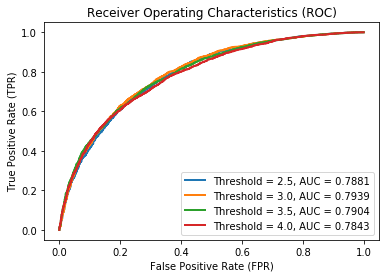

In [37]:
print("-------------Question 29-------------")
trainset, testset = train_test_split(data_in_ratings, test_size=0.1, random_state=0)
thresholds = [2.5,3,3.5,4]

svd = SVD(n_factors=32, biased=True)
svd.fit(trainset)
predictions = svd.test(testset) #list of prediction object: contains attribute r_ui (true rating) and est (estimated rating)

true_ratings = np.array([i.r_ui for i in predictions])
pred_ratings = np.array([i.est for i in predictions])

plt.figure()
for t in thresholds: 
    y_true = true_ratings>=t
    y_pred = pred_ratings
    FPR, TPR, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(FPR, TPR)
    #plt.figure()
    plt.plot(FPR, TPR, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (t,roc_auc))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc ='lower right')
    plt.title('Receiver Operating Characteristics (ROC)')
    #plt.title('Receiver Operating Characteristics (ROC) for threshold = %0.1f' %t)

plt.show()

-------------Question 30-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3726
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3595
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3673
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3765
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3630
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3695
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3709
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3795
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3693
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3600
Computing the pearson similarity matrix...
Done computing simi

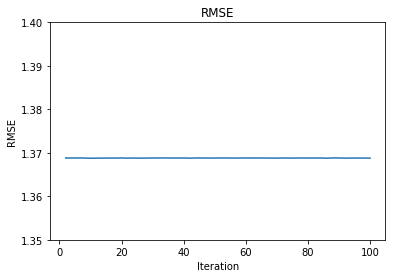

Mean RSME: 1.368800702716105


In [38]:
print("-------------Question 30-------------")
#split to 10 folds
k_fold = KFold(n_splits=10)

# make sure to have ml-latest-small in the same folder
file_path = os.path.expanduser('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale= (0,5)) 
dataset = Dataset.load_from_file(file_path, reader=reader)

data = {}
avg_user_rating = {}
rmse = []

for i in dataset.raw_ratings:
    data.setdefault(i[0], []).append(i[2])

for i, j in data.items():
    avg_user_rating[i] = np.average(j)

for k in range(2,102,2):
    rmse_temp = []
    knn_with_means = KNNWithMeans(k = k, sim_options = {'name':'pearson', 'user_based': True})
    
    for trainset, testset in k_fold.split(dataset):
        knn_with_means.fit(trainset)
        knn_pred = knn_with_means.test(testset)
        pred = []
       
        for i in knn_pred:
            pred.append(Prediction(i[0], i[1], i[2], avg_user_rating[i[0]], i[4]))
        
        rmse_temp.append(accuracy.rmse(pred))
    rmse.append(np.mean(rmse_temp))
    

k = np.arange(2,102,2)
plt.plot(k, rmse)
plt.title('RMSE')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
axes = plt.gca()
axes.set_ylim([1.35, 1.4])
plt.show()

print('Mean RSME:', np.mean(rmse))

-------------Question 31-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3503
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3756
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3737
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3614
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3693
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3694
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3559
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3497
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3529
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3427
Computing the pearson similarity matrix...
Done computing simi

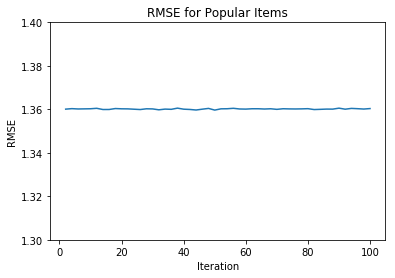

Mean RSME: 1.3601632114207403


In [40]:
print("-------------Question 31-------------")
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratingFreq = dict(Counter(ratings.iloc[:,1].values))

# popular movies 
def trim(testset):
    for i in testset:
        if (ratingFreq[int(i[1])] <= 2): 
            testset.remove(i)
    return testset

data = {}
avg_user_rating = {}
rmse = []

for i in dataset.raw_ratings:
    data.setdefault(i[0], []).append(i[2])

for i, j in data.items():
    avg_user_rating[i] = np.average(j)

for k in range(2,102,2):
    rmse_temp = []
    knn_with_means = KNNWithMeans(k = k, sim_options = {'name':'pearson', 'user_based': True})
    
    for trainset, testset in k_fold.split(dataset):
        knn_with_means.fit(trainset)
        testset = trim(testset) #trim step
        knn_pred = knn_with_means.test(testset)
        pred = []
       
        for i in knn_pred:
            pred.append(Prediction(i[0], i[1], i[2], avg_user_rating[i[0]], i[4]))
        
        rmse_temp.append(accuracy.rmse(pred))
    rmse.append(np.mean(rmse_temp))
    
k = np.arange(2,102,2)
plt.plot(k, rmse)
plt.title('RMSE for Popular Items')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
axes = plt.gca()
axes.set_ylim([1.3, 1.4])
plt.show()

print('Mean RSME:', np.mean(rmse))

-------------Question 32-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3876
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3714
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3663
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3878
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3826
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3693
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3613
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3782
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3639
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3774
Computing the pearson similarity matrix...
Done computing simi

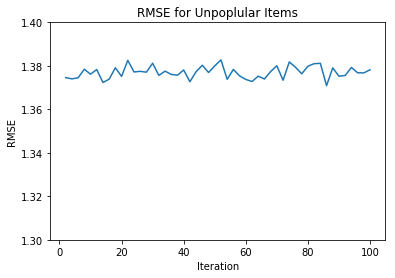

Mean RSME: 1.3770062362056796


In [41]:
print("-------------Question 32-------------")
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratingFreq = dict(Counter(ratings.iloc[:,1].values))

# unpopular movies 
def trim(testset):
    for i in testset:
        if (ratingFreq[int(i[1])] > 2): 
            testset.remove(i)
    return testset

data = {}
avg_user_rating = {}
rmse = []

for i in dataset.raw_ratings:
    data.setdefault(i[0], []).append(i[2])

for k, v in data.items():
    avg_user_rating[k] = np.average(v)

for k in range(2,102,2):
    rmse_temp = []
    knn_with_means = KNNWithMeans(k = k, sim_options = {'name':'pearson', 'user_based': True})
    
    for trainset, testset in k_fold.split(dataset):
        testset = trim(testset) #trim step
        knn_with_means.fit(trainset)
        knn_pred = knn_with_means.test(testset)
        pred = []
       
        for i in knn_pred:
            pred.append(Prediction(i[0], i[1], i[2], avg_user_rating[i[0]], i[4]))
        
        rmse_temp.append(accuracy.rmse(pred))
    rmse.append(np.mean(rmse_temp))

k = np.arange(2,102,2)
plt.plot(k, rmse)
plt.title('RMSE for Unpoplular Items')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
axes = plt.gca()
axes.set_ylim([1.3, 1.4])
plt.show()

print('Mean RSME:', np.mean(rmse))

-------------Question 33-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3462
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3811
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3892
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3780
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3730
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3568
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3767
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3897
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3754
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3691
Computing the pearson similarity matrix...
Done computing simi

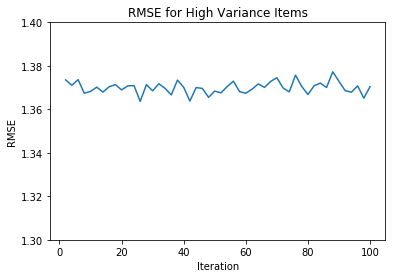

Mean RSME: 1.3699738490656261


In [42]:
print("-------------Question 33-------------")
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratingFreq = dict(Counter(ratings.iloc[:,1].values))
avg_user_rating = {}
movieRatings = ratings.iloc[:,1:3].values
var= {}
rmse = []

def trim(testset):
    for i in testset:
        if (ratingFreq[int(i[1])] < 5 or var[int(i[1])] < 2):
            testset.remove(i)
    return testset

data = {}
for i in dataset.raw_ratings:
    data.setdefault(i[0], []).append(i[2])

for i, j in data.items():
    avg_user_rating[i] = np.average(j)
    
data = {}
for i in movieRatings:
    data.setdefault(i[0], []).append(i[1])
    
for i, j in data.items():
    var[i] = np.var(j)
    

for k in range(2,102,2):
    rmse_temp = []
    knn_with_means = KNNWithMeans(k = k, sim_options = {'name':'pearson', 'user_based': True})
    
    for trainset, testset in k_fold.split(dataset):
        testset = trim(testset) #trim step
        knn_with_means.fit(trainset)
        knn_pred = knn_with_means.test(testset)
        pred = []
        for i in knn_pred:
            pred.append(Prediction(i[0], i[1], i[2], avg_user_rating[i[0]], i[4]))
        rmse_temp.append(accuracy.rmse(pred))
    rmse.append(np.mean(rmse_temp))
    


k = np.arange(2,102,2)
plt.plot(k, rmse)
plt.title('RMSE for High Variance Items')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
axes = plt.gca()
axes.set_ylim([1.3, 1.4])
plt.show()

print('Mean RSME:', np.mean(rmse))

-------------Question 34-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.


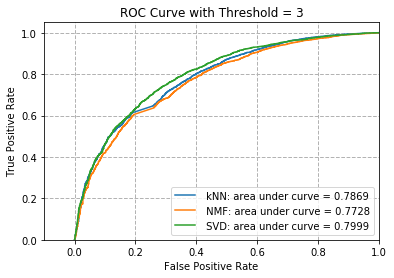

In [43]:
print("-------------Question 34-------------")
# ROC curves for kNN, NNMF, and MF
# compare performance of the filters
threshold = 3
file_path = os.path.expanduser('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1, rating_scale= (0,5))
dataset = Dataset.load_from_file(file_path, reader=reader)
trainset, testset = train_test_split(dataset, test_size=0.1)

# KNN
knn = KNNWithMeans(k=20, sim_options={'name': 'pearson'})
knn.fit(trainset)
prediction_knn = knn.test(testset)

true_knn = []
pred_knn = []

for user, item, t, p, x in prediction_knn:
    if t >= threshold:
        true_knn.append(1)
    else:
        true_knn.append(0)
    pred_knn.append(p)

fpr_knn, tpr_knn, _ = roc_curve(true_knn, pred_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# NMF
nmf = NMF(n_factors=20)
nmf.fit(trainset)
prediction_nmf = nmf.test(testset)

true_nmf = []
pred_nmf = []

for uid, mid, t, p, misc in prediction_nmf:
    if t >= threshold:
        true_nmf.append(1)
    else:
        true_nmf.append(0)
    pred_nmf.append(p)

fpr_nmf, tpr_nmf, _ = roc_curve(true_nmf, pred_nmf)
roc_auc_nmf = auc(fpr_nmf, tpr_nmf)

# SVD
svd = SVD(n_factors=20)
svd.fit(trainset)
prediction_svd = svd.test(testset)

true_svd = []
pred_svd = []

for uid, mid, t, p, misc in prediction_svd:
    if t >= threshold:
        true_svd.append(1)
    else:
        true_svd.append(0)
    pred_svd.append(p)

fpr_svd, tpr_svd, _ = roc_curve(true_svd, pred_svd)
roc_auc_svd= auc(fpr_svd, tpr_svd)

plt.plot(fpr_knn, tpr_knn, label= ' kNN: area under curve = %0.4f' % roc_auc_knn)
plt.plot(fpr_nmf, tpr_nmf, label= ' NMF: area under curve = %0.4f' % roc_auc_nmf)
plt.plot(fpr_svd, tpr_svd, label= ' SVD: area under curve = %0.4f' % roc_auc_svd)
plt.title('ROC Curve with Threshold = 3')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.grid(color='0.7', linestyle='--', linewidth=1)

plt.show()

In [ ]:
print("-------------Question 35-------------")


-------------Question 36-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

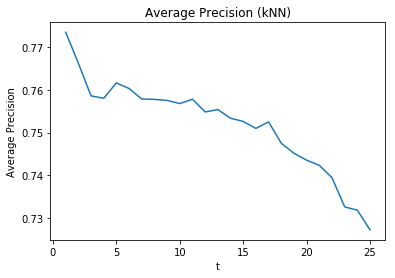

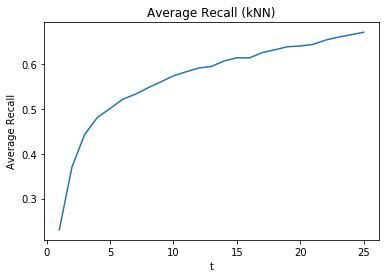

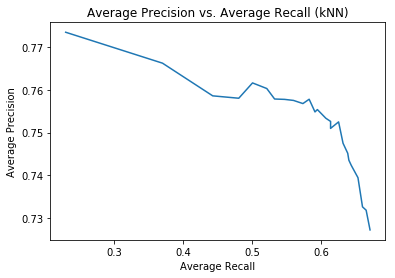

In [44]:
print("-------------Question 36-------------")
def precision_function(prediction, t):
    G = defaultdict(list)
    S = defaultdict(list)
    
    for p in prediction:
        if (p[2] > 3): # set threshold to 3
            G[p[0]].append((p[1], p[2], p[3]))
            
    #drop user if |G| = 0
    for i, j in G.items():
        if (len(G[i]) == 0):
            del G[i]
    
    for p in prediction:
        S[p[0]].append((p[1], p[2], p[3]))
        S[p[0]] = sorted(S[p[0]], key=lambda x: x[2], reverse=True)[:t]
        
    precisions = []
    for i, j in S.items():
        size_S = len(S[i])
        
        # if some user in the test set has rated less than t items, drop user
        if (size_S < t):
            continue
            
        count = 0
        for k in S[i]:
            if (k in G[i]):
                count+=1
        
        precision_temp = count/size_S
        precisions.append(precision_temp)

    result = np.mean(precisions)
    return result

def recall_function(prediction, t):
    G = defaultdict(list)
    S = defaultdict(list)
    
    for p in prediction:
        if (p[2] > 3): # set threshold to 3
            G[p[0]].append((p[1], p[2], p[3]))
            
        S[p[0]].append((p[1], p[2], p[3]))
        S[p[0]] = sorted(S[p[0]], key=lambda x: x[2], reverse=True)[:t]
    
    recalls = []
    for i, j in S.items():
        size_S = len(S[i])
        size_G = len(G[i])
        
        # if some user in the test set has rated less than t items, drop user
        if (size_S < t):
            continue
            
        count = 0
        for item in S[i]:
            if (item in G[i]):
                count+=1
                
        if (size_G != 0):
            recall_temp = count / size_G
            recalls.append(recall_temp)
    
    result = np.mean(recalls)
    return result

# kNN filter

model = KNNWithMeans(k = 20, sim_options = {'name': 'pearson'})
precision_kNN = []
recall_kNN = []

for t in range(1,26):
    precision_temp = []
    recall_temp = []
    
    for trainset, testset in k_fold.split(dataset):    
        #use k value from Q11, k = 20
        model.fit(trainset)
        prediction = model.test(testset)
        precision_i = precision_function(prediction, t)
        recall_i = recall_function(prediction, t)
        
        precision_temp.append(precision_i)
        recall_temp.append(recall_i)
        
    precision_kNN.append(np.mean(precision_temp))
    recall_kNN.append(np.mean(recall_temp))    

t = np.arange(1,26,1)
plt.plot(t, precision_kNN)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precision (kNN)')
plt.show()


plt.plot(t, recall_kNN)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('Average Recall (kNN)')
plt.show()


plt.plot(recall_kNN, precision_kNN)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Average Recall (kNN)')
plt.show()

-------------Question 37-------------
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25


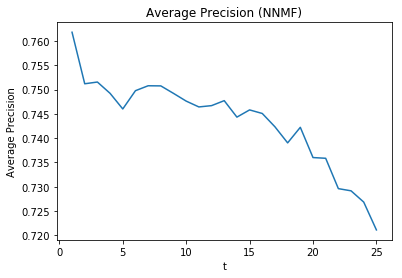

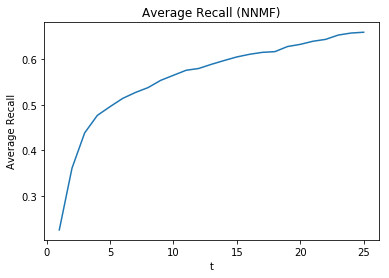

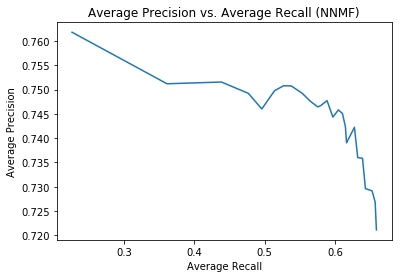

In [45]:
print("-------------Question 37-------------")
# NNMF filter
precision_nmf = []
recall_nmf = []
model = NMF(n_factors = 20)

for t in range(1,26):
    print('iteration: ', t)
    precision_temp = []
    recall_temp = []
    
    for trainset, testset in k_fold.split(dataset):    
        model.fit(trainset)
        prediction = model.test(testset)
        precision_i = precision_function(prediction, t)
        recall_i = recall_function(prediction, t)
        
        precision_temp.append(precision_i)
        recall_temp.append(recall_i)
        
    precision_nmf.append(np.mean(precision_temp))
    recall_nmf.append(np.mean(recall_temp))    

t = np.arange(1,26)
plt.plot(t, precision_nmf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precision (NNMF)')
plt.show()


plt.plot(t, recall_nmf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('Average Recall (NNMF)')
plt.show()


plt.plot(recall_nmf, precision_nmf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Average Recall (NNMF)')
plt.show()

-------------Question 38-------------
iteration:  1
iteration:  2
iteration:  3
iteration:  4
iteration:  5
iteration:  6
iteration:  7
iteration:  8
iteration:  9
iteration:  10
iteration:  11
iteration:  12
iteration:  13
iteration:  14
iteration:  15
iteration:  16
iteration:  17
iteration:  18
iteration:  19
iteration:  20
iteration:  21
iteration:  22
iteration:  23
iteration:  24
iteration:  25


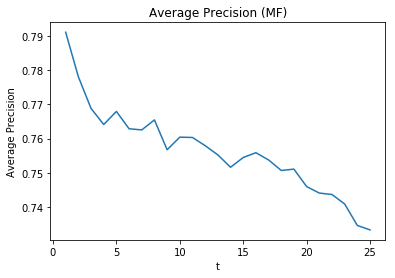

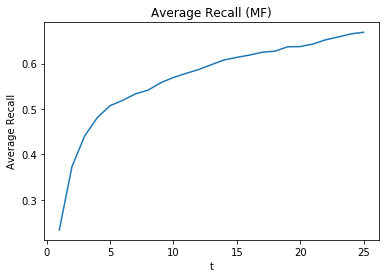

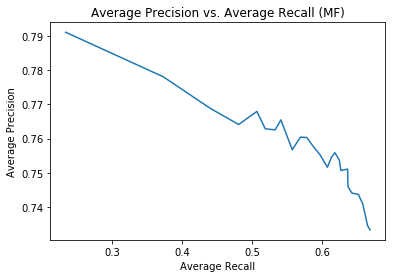

In [46]:
print("-------------Question 38-------------")
# MF with bias-based filter
model = SVD(n_factors = 8)
precision_mf = []
recall_mf = []

for t in range(1,26):
    print('iteration: ', t)
    precision_temp = []
    recall_temp = []
    
    for trainset, testset in k_fold.split(dataset):    
        model.fit(trainset)
        prediction = model.test(testset)
        precision_i = precision_function(prediction, t)
        recall_i = recall_function(prediction, t)
        
        precision_temp.append(precision_i)
        recall_temp.append(recall_i)
        
    precision_mf.append(np.mean(precision_temp))
    recall_mf.append(np.mean(recall_temp))    

t = np.arange(1,26,1)
plt.plot(t, precision_mf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precision (MF)')
plt.show()


plt.plot(t, recall_mf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('Average Recall (MF)')
plt.show()


plt.plot(recall_mf, precision_mf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Average Recall (MF)')
plt.show()

-------------Question 39-------------


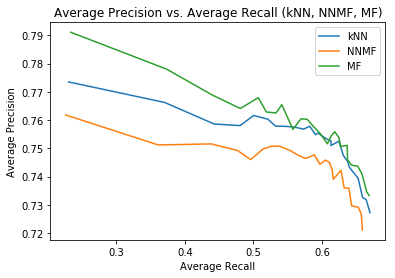

In [47]:
print("-------------Question 39-------------")
#plot three curves from kNN, NNMF, and MF on the same plot
plt.plot(recall_kNN, precision_kNN, label = 'kNN')
plt.plot(recall_nmf, precision_nmf, label = 'NNMF')
plt.plot(recall_mf, precision_mf, label = 'MF')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision vs. Average Recall (kNN, NNMF, MF)')
plt.legend()

plt.show()